## Kmeans

In [20]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [21]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
# 150筆資料 2個特徵 分成3群 標準差0.5 是否重新洗牌shuffle

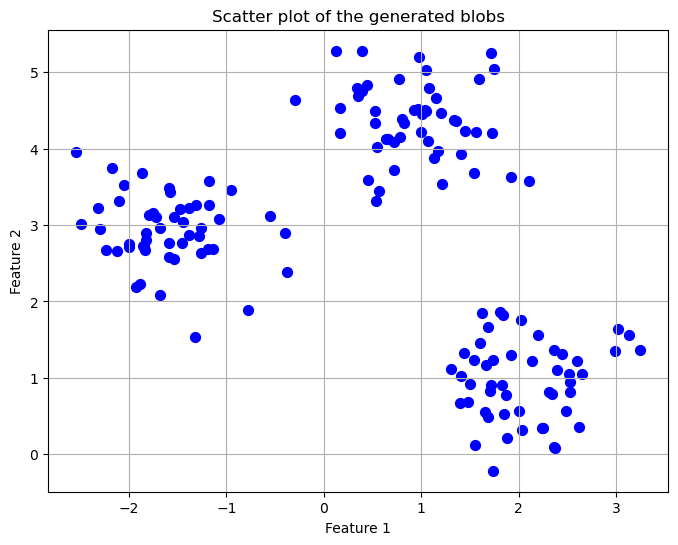

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 繪製散佈圖
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=50)
plt.title("Scatter plot of the generated blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## 訓練模型

## init：
random：隨機指定質心。

k-means++：依樣本點與既有質心的距離平方和(inertia_)，愈遠的樣本點愈有機會被選擇為下一個質心。詳閱『K-means聚類演算法的三種改進』。

## n_init='auto'：

且init='k-means++'時n_init=1，表k-means++只執行一次。

且init=‘random’時n_init=10，表執行隨機指定質心10次，選擇其中最好的一次。



In [23]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, 
            init='k-means++',            
            max_iter=300,
            random_state=0)



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


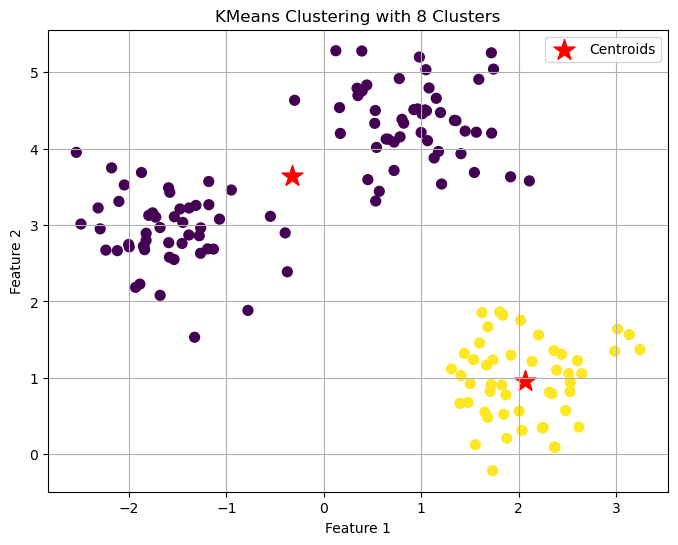

In [24]:
# 執行聚類並取得分組結果
y_km = km.fit_predict(X)

# 繪製聚類結果的散佈圖
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_km, marker='o', s=50, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s=250, marker='*', c='red', label='Centroids')
plt.title("KMeans Clustering with 8 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## 模型評估

In [25]:
# 顯示失真(Distortion)的程度 越小越好
# 這個值越小表示分群效果越好，因為這意味著資料點與其群組中心之間的距離較小，群組內的凝聚力較高。
y_km = km.fit_predict(X)                  
print('Distortion: %.2f' % km.inertia_)

Distortion: 283.46


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 繪製輪廓圖

pip install yellowbrick

## 輪廓分數（Silhouette Score）

是一種衡量分群質量的指標，範圍在 -1 到 1 之間。其分數反映了資料點在分群中的適合程度：

- **接近 1**：表示資料點非常適合當前的群組，且與其他群組的資料點有明顯的距離。這表示該資料點與其分群的相似性高，與其他群組的相似性低，分群效果理想。
  
- **接近 0**：表示資料點位於兩個群組的邊界，可能不適合任何群組或有可能被分到不同的群組。這種情況下，分群效果不明顯，可能需要重新調整分群方法或群數。
  
- **接近 -1**：表示資料點更適合其他群組，而不是當前的群組，這是分群質量差的指標。

因此，**輪廓分數愈接近 1 愈好**，因為這表示資料點明顯屬於某一群組，且與其他群組的資料點有較大的區別，分群的效果較好。這通常是優秀分群模型的特徵。

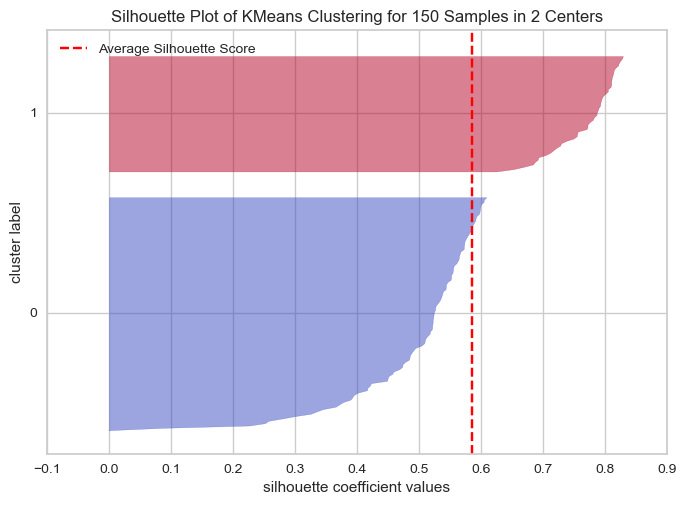

Silhouette Average: 0.58


In [26]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
visualizer = SilhouetteVisualizer(km, colors='coolwarm')
visualizer.fit(X)
visualizer.show()

silhouette_avg = silhouette_score(X, km.labels_)
print(f'Silhouette Average: {silhouette_avg:.2f}')

## 轉折判斷法(Elbow)

In [27]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i, 
                init='k-means++',            
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

## 繪圖

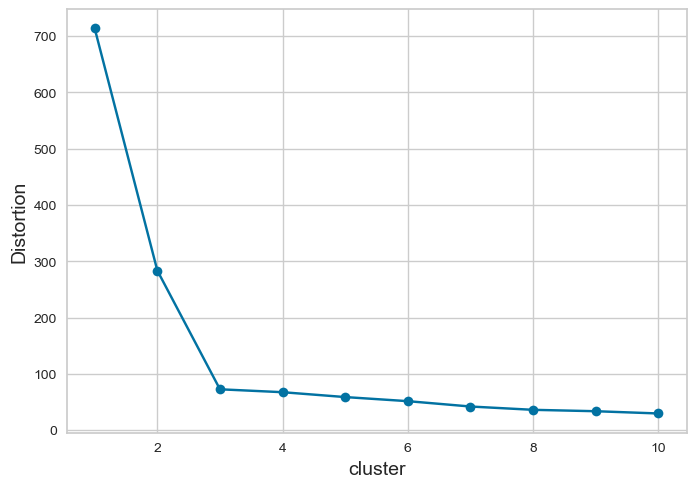

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('cluster', fontsize=14)
plt.ylabel('Distortion', fontsize=14);#失真

## 根據轉折判斷法　修改n_clusters為3

In [29]:
km = KMeans(n_clusters=3, 
                init='k-means++',            
                max_iter=300,
                random_state=0)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


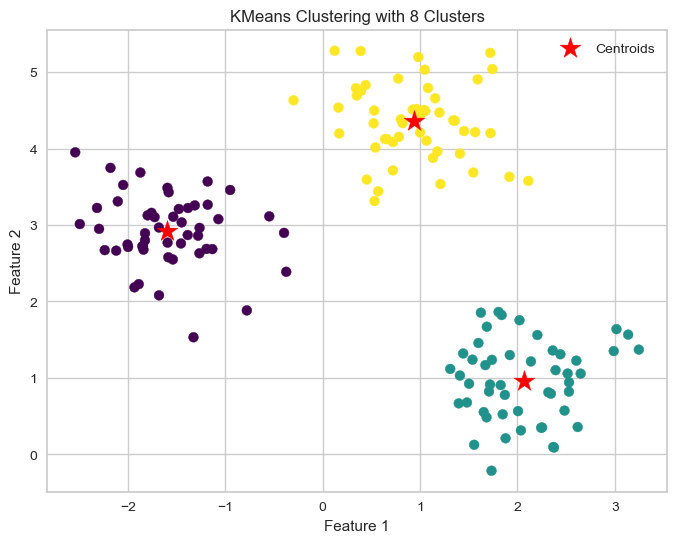

In [30]:
# 執行聚類並取得分組結果
y_km = km.fit_predict(X)

# 繪製聚類結果的散佈圖
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_km, marker='o', s=50, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s=250, marker='*', c='red', label='Centroids')
plt.title("KMeans Clustering with 8 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## 繪製輪廓圖

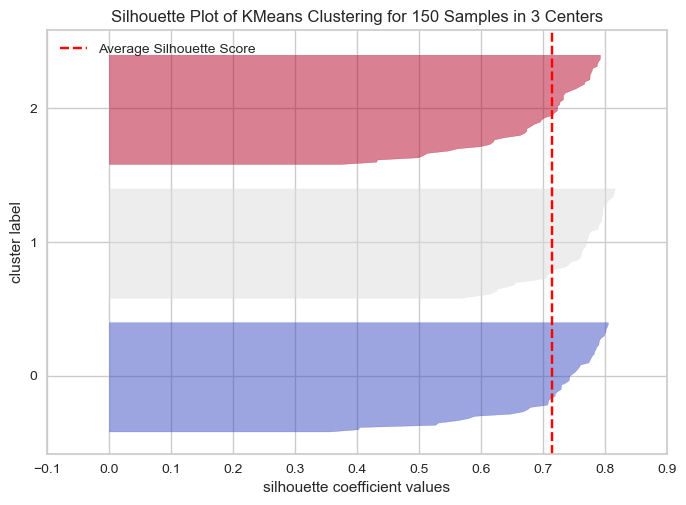

Silhouette Average: 0.71


In [31]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
visualizer = SilhouetteVisualizer(km, colors='coolwarm')
visualizer.fit(X)
visualizer.show()

silhouette_avg = silhouette_score(X, km.labels_)
print(f'Silhouette Average: {silhouette_avg:.2f}')

## 使用輪廓係數找最佳分類數

In [32]:
import numpy as np
# 測試 2~10 群的分數
silhouette_score_list = []
print('輪廓分數愈接近1愈好:')
for i in range(2, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    y_km = km.fit_predict(X)#KMeansn算出的標籤
    silhouette_score_list.append(silhouette_score(X, y_km))
    print(f'{i}:{silhouette_score_list[-1]:.2f}')

print(f'最大值 {np.argmax(silhouette_score_list)+2}: {np.max(silhouette_score_list):.2f}')

輪廓分數愈接近1愈好:
2:0.58
3:0.71
4:0.57
5:0.44
6:0.46
7:0.32


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

8:0.33
9:0.34
10:0.35
最大值 3: 0.71


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

# 凝聚階層集群(Agglomerative Hierarchical Clustering, AHC)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


(50, 2)


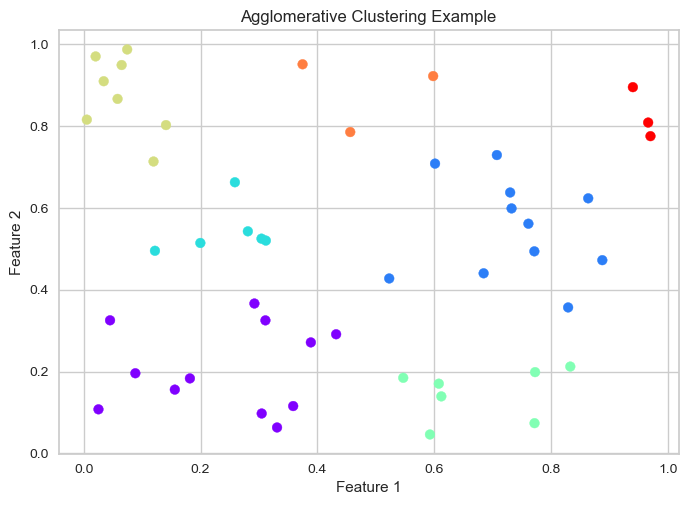

In [34]:
from sklearn.cluster import AgglomerativeClustering
# 生成一些二維數據
np.random.seed(42)
X = np.random.rand(50, 2)
print(X.shape)
# 使用AgglomerativeClustering進行聚類
clustering = AgglomerativeClustering(n_clusters=7)
clustering.fit(X)

# 繪製結果
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='rainbow')
plt.title("Agglomerative Clustering Example")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [35]:
from sklearn.metrics import silhouette_score
silhouette_score(X,clustering.labels_)

0.45818858824014347

In [36]:
# 測試 2~10 群的分數
silhouette_score_list = []
print('輪廓分數愈接近1愈好:')
for i in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=i)
    y_km = clustering.fit_predict(X)
    silhouette_score_list.append(silhouette_score(X, y_km))
    print(f'{i}:{silhouette_score_list[-1]:.2f}')
print(f'最大值 {np.argmax(silhouette_score_list) + 2}: {np.max(silhouette_score_list):.2f}')

輪廓分數愈接近1愈好:
2:0.35
3:0.43
4:0.42
5:0.43
6:0.43
7:0.46
8:0.47
9:0.44
10:0.46
最大值 8: 0.47


# DBSCAN

In [37]:
import os
os.environ['OMP_NUM_THREADS'] = '6'

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
blobs = pd.read_csv("./cluster_blobs.csv")
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<Axes: xlabel='X1', ylabel='X2'>

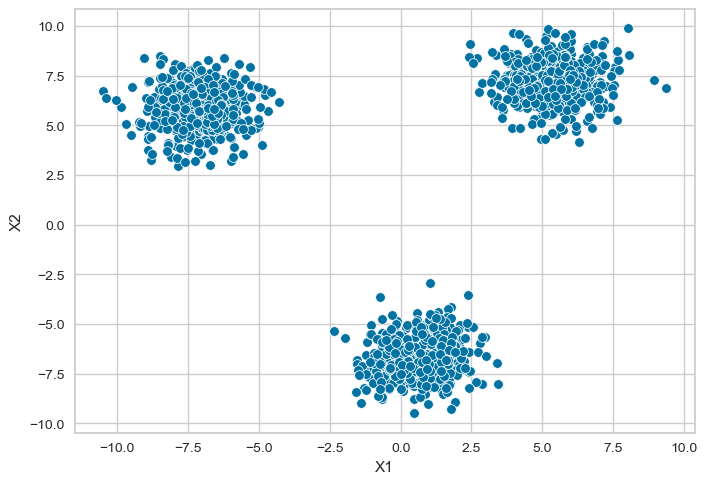

In [40]:
sns.scatterplot(data=blobs,x='X1',y='X2')

In [41]:
moons = pd.read_csv("./cluster_moons.csv")
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<Axes: xlabel='X1', ylabel='X2'>

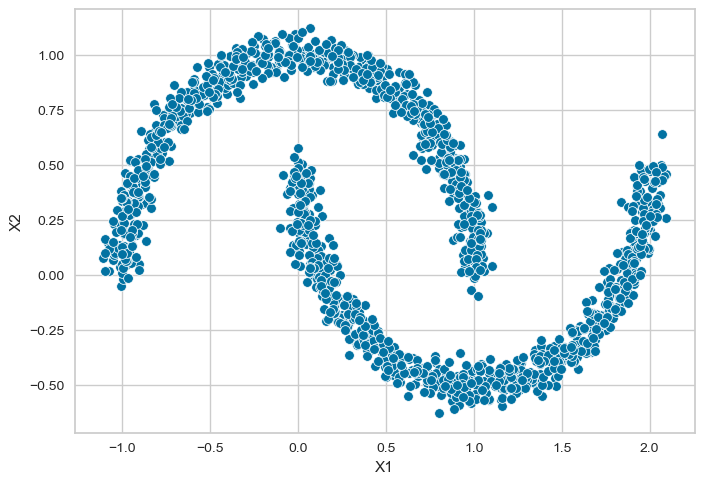

In [42]:
sns.scatterplot(data=moons,x='X1',y='X2')

In [43]:
circles = pd.read_csv("./cluster_circles.csv")
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<Axes: xlabel='X1', ylabel='X2'>

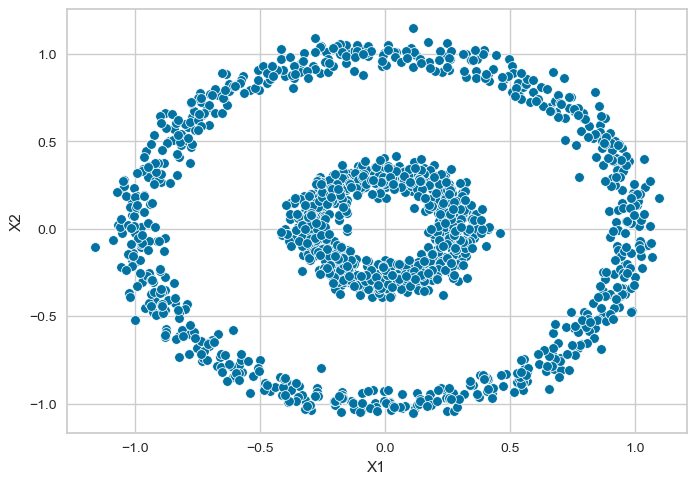

In [44]:
sns.scatterplot(data=circles,x='X1',y='X2')

## 用於顯示群集的散佈圖

In [45]:
def display_model(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x="X1",y="X2",hue=labels,palette="Set1")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


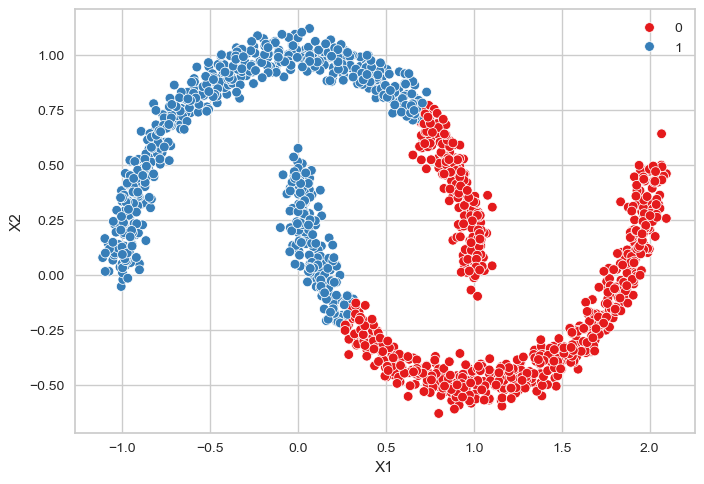

In [46]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
display_model(model,moons)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


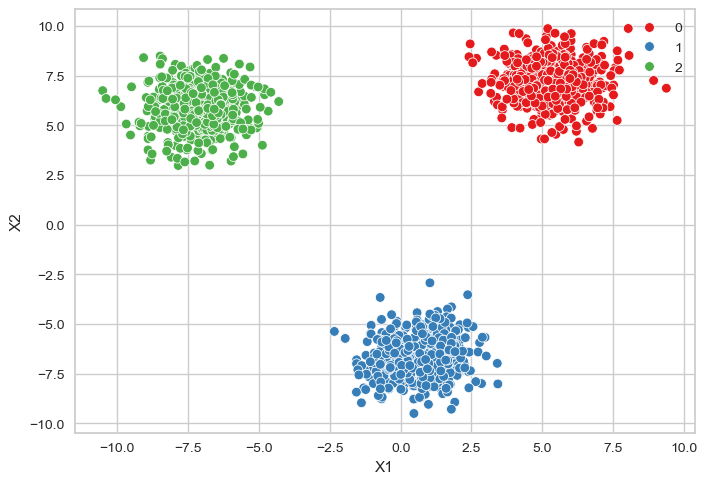

In [47]:
model = KMeans(n_clusters=3)
display_model(model,blobs)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


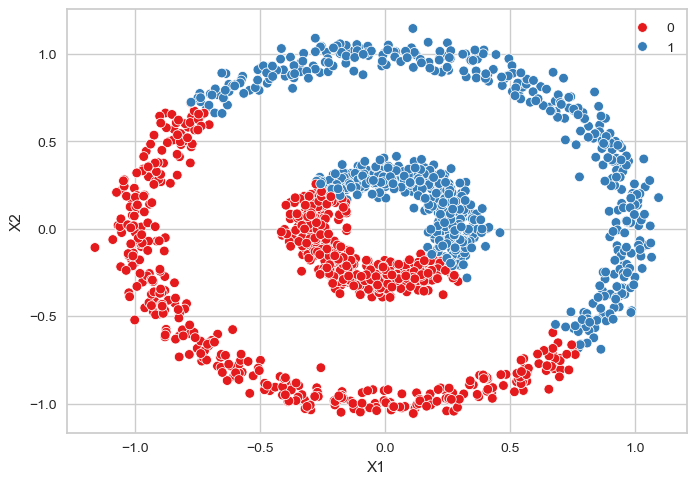

In [48]:
model = KMeans(n_clusters=2)
display_model(model,circles)

## DBSCAN 

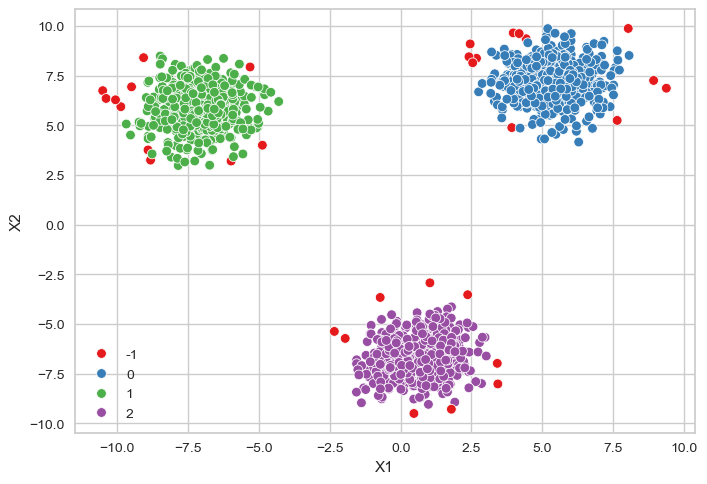

In [49]:
from sklearn.cluster import DBSCAN
model =  DBSCAN(eps=0.6)
display_model(model,blobs)

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_score_list = []
eps_values = np.arange(0.1, 1.1, 0.1)  # 0.1 到 1 之間的值，步長為 0.1

print('輪廓分數愈接近1愈好:')
for eps in eps_values:
    testModel = DBSCAN(eps=eps)
    y_km = testModel.fit_predict(blobs)
    
    # 如果所有點都被標記為噪聲，則忽略這次計算
    if len(set(y_km)) > 1:
        silhouette_score_list.append(silhouette_score(blobs, y_km))
        print(f'{eps:.1f}: {silhouette_score_list[-1]:.2f}')
    else:
        silhouette_score_list.append(-1)  # -1 表示無效的分數

best_index = np.argmax(silhouette_score_list)
best_eps = eps_values[best_index]
best_score = silhouette_score_list[best_index]

print(f'最佳 eps={best_eps:.1f}: 最大輪廓分數 {best_score:.2f}')

輪廓分數愈接近1愈好:
0.1: -0.70
0.2: -0.33
0.3: 0.20
0.4: 0.38
0.5: 0.78
0.6: 0.80
0.7: 0.82
0.8: 0.83
0.9: 0.82
1.0: 0.80
最佳 eps=0.8: 最大輪廓分數 0.83


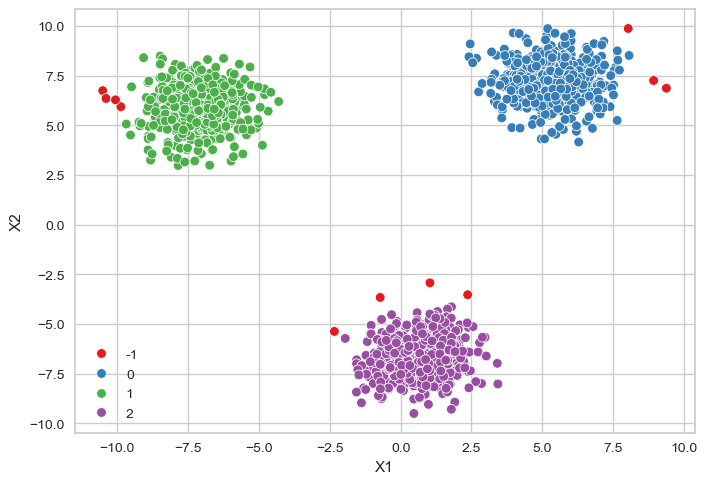

In [51]:
from sklearn.cluster import DBSCAN
model =  DBSCAN(eps=0.8)
display_model(model,blobs)

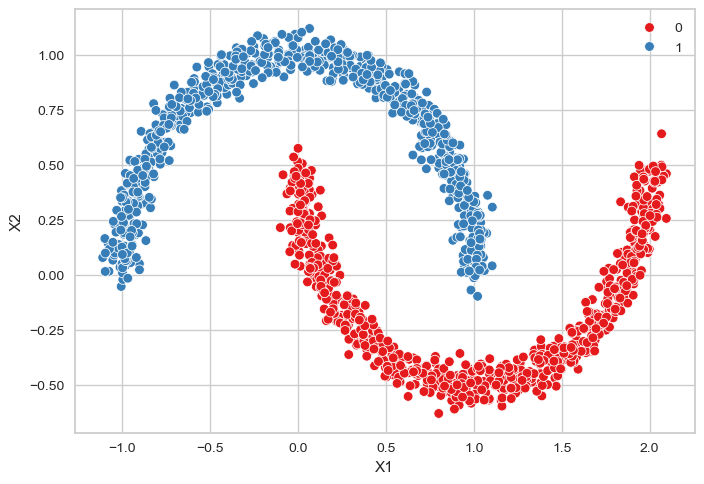

In [52]:
model =  DBSCAN(eps=0.15)
display_model(model,moons)

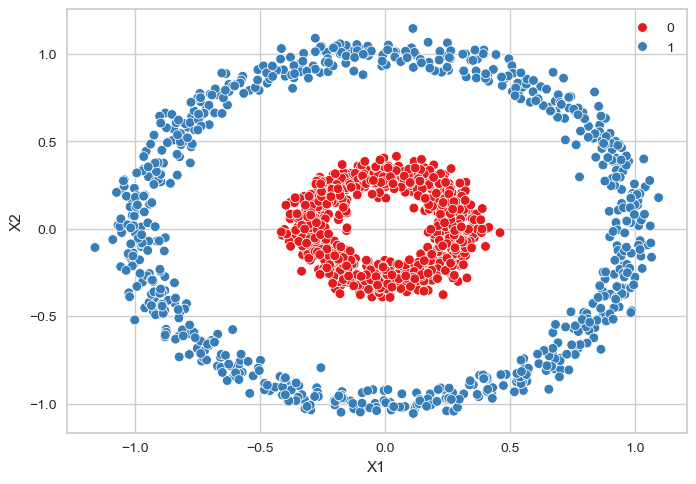

In [53]:
display_model(model,circles)

# 自我訓練(Self-training)測試

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.semi_supervised import SelfTrainingClassifier

In [55]:
X, y = datasets.load_iris(return_X_y=True)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(len(y_train))

120


## 設定 約50% 資料為沒有標註(-1)

In [57]:
rng = np.random.RandomState(0)#設定rng的亂數seed
print(y_train.shape)
y_rand = rng.rand(y_train.shape[0])#均勻分布亂數
y_rand

(120,)


array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
       0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
       0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194,
       0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ,
       0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ,
       0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672,
       0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077,
       0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676,
       0.16130952, 0.65310833, 0.2532916 , 0.46631077, 0.24442559,
       0.15896958, 0.11037514, 0.65632959, 0.13818295, 0.19658236,
       0.36872517, 0.82099323, 0.09710128, 0.83794491, 0.09609841,
       0.97645947, 0.4686512 , 0.97676109, 0.60484552, 0.73926

In [58]:
rng = np.random.RandomState(0)
y_rand = rng.rand(y_train.shape[0])
y_50 = np.copy(y_train)
y_50[y_rand < 0.5] = -1
print(y_50)
print(np.count_nonzero(y_50==-1))#y_50中等於-1的元素個數

[ 0  2  1  1 -1  1 -1  1  2 -1  1  0  0  2 -1 -1 -1  1  1  0  0  0 -1  0
 -1  0 -1  0  0 -1 -1  1 -1  1 -1  2  0  0  2  1 -1 -1  1 -1  1  0 -1 -1
 -1 -1  0 -1  1 -1 -1 -1  0 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  0 -1  1 -1
  2  1  1 -1 -1 -1 -1 -1 -1 -1 -1  2  0 -1  0 -1  1  2 -1  2 -1  2 -1 -1
  0 -1  1 -1  2 -1  0  2 -1  0  2  2 -1  2 -1  0  1 -1  2 -1  0  2  1  0]
57


## 模型訓練

In [59]:
base_class = SVC(kernel="rbf",gamma=0.5)
base_class.fit(X_train,y_50)
base_class.score(X_test,y_test)

0.4666666666666667

In [60]:
base_class2 = SVC(kernel="rbf",gamma=0.5,probability=True)
clf = SelfTrainingClassifier(base_class2).fit(X_train,y_50)
clf.score(X_test,y_test)

1.0

# 標註傳播(Label propagation)測試

In [61]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation

In [62]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, random_state=1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, 
                                            random_state=1, stratify=y)

In [64]:
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(
          X_train, y_train, test_size=0.5, random_state=1, stratify=y_train)
X_train_mixed = np.concatenate((X_train_lab, X_test_unlab))#將分割的X合併
nolabel = [-1 for _ in range(len(y_test_unlab))]#將分割的y合併0.5給-1
y_train_mixed = np.concatenate((y_train_lab, nolabel))
y_train_mixed.shape

(500,)

## LogisticRegression 模型訓練與評估 基準點

In [65]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X_train_mixed,y_train_mixed)
clf2.score(X_test,y_test)

0.23

## Label propagation 模型訓練與評估

In [66]:
clf = LabelPropagation()
clf.fit(X_train_mixed,y_train_mixed)
clf.score(X_test,y_test)

0.856

# LabelSpreading 測試

In [67]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading

In [68]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, random_state=2)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, 
                                            random_state=1, stratify=y)

In [70]:
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(
          X_train, y_train, test_size=0.5, random_state=1, stratify=y_train)
##在分割50筆資料給-1 標記為無標籤
X_train_mixed = np.concatenate((X_train_lab, X_test_unlab))
nolabel = [-1 for _ in range(len(y_test_unlab))]##在分割50筆資料給-1
y_train_mixed = np.concatenate((y_train_lab, nolabel))
y_train_mixed.shape

(500,)

## LogisticRegression 模型訓練與評估 基準點

In [71]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression()
clf2.fit(X_train_mixed, y_train_mixed)
clf2.score(X_test, y_test)

0.29

## LabelSpreading 模型訓練與評估

In [72]:
from sklearn.semi_supervised import LabelSpreading
clf = LabelSpreading()
clf.fit(X_train_mixed, y_train_mixed)
clf.score(X_test, y_test)

0.866

# 多數決演算法(VotingClassifier)測試

In [73]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

In [74]:
X, y = datasets.load_breast_cancer(return_X_y=True)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 特徵縮放

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 模型訓練

In [77]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
estimators = [('svc',SVC()),('rf',RandomForestClassifier()),('nb',GaussianNB())]
clf = VotingClassifier(estimators)
clf.fit(X_train_std,y_train)

VotingClassifier(estimators=[('svc', SVC()), ('rf', RandomForestClassifier()),
                             ('nb', GaussianNB())])

In [78]:
clf.score(X_test_std,y_test)

0.9649122807017544

In [79]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

estimators = [('svc',SVC()),('rf',RandomForestClassifier()),('nb',GaussianNB())]
clf = VotingClassifier(estimators)
clf.fit(X_train_std,y_train)

VotingClassifier(estimators=[('svc', SVC()), ('rf', RandomForestClassifier()),
                             ('nb', GaussianNB())])

In [80]:
clf.score(X_test_std,y_test)

0.9649122807017544

# Bagging演算法測試

In [81]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
X, y = datasets.load_breast_cancer(return_X_y=True)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 模型訓練

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
base_est = GaussianNB()
clf = BaggingClassifier(estimator=base_est,n_estimators=50)
clf.fit(X_train_std,y_train)

BaggingClassifier(estimator=GaussianNB(), n_estimators=50)

In [90]:
clf.score(X_test_std,y_test)

0.956140350877193

In [89]:
gb = GaussianNB()
gb.fit(X_train_std,y_train)
gb.score(X_test_std,y_test)

0.956140350877193

# XGBoost測試

pip install xgboost -U

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

In [91]:
# 載入必要的模組
from xgboost import XGBRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# 載入波士頓房價數據集
boston = datasets.fetch_california_housing()
X = boston.data
y = boston.target

In [95]:
import pandas as pd
df = pd.read_csv("./california_housing.csv")
y = df["target"]
X = df.drop("target",axis=1)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
from xgboost import XGBRegressor
# 初始化XGBRegressor模型
model = XGBRegressor()

In [99]:
# 訓練模型
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [100]:
# 使用模型進行預測
y_pred = model.predict(X_test)

In [101]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2225899267544737
